In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Experiment import Experiment
from algorithms import Greedy, SoftmaxPolicy, UCB, ThompsonSampling, Reinforce
from utils import create_inverse_schedule
from metrics import MeanCummulativeRegret, PercentOptimalArmPull, AverageRegretOverTime

In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [2]:
experiment = Experiment()
experiment.simulate()

0.7975412414931331
0.1651884169327248
----------
0.1
0.05
0.03333333333333333
0.025
0.02
0.016666666666666666
0.014285714285714287
0.0125
0.011111111111111112
0.01
0.009090909090909092
0.008333333333333333
0.007692307692307693
0.0071428571428571435
0.006666666666666667
0.00625
0.0058823529411764705
0.005555555555555556
0.005263157894736842
0.005
0.004761904761904762
0.004545454545454546
0.004347826086956522
0.004166666666666667
0.004
0.0038461538461538464
0.003703703703703704
0.0035714285714285718
0.003448275862068966
0.0033333333333333335
0.0032258064516129032
0.003125
0.0030303030303030303
0.0029411764705882353
0.002857142857142857
0.002777777777777778
0.002702702702702703
0.002631578947368421
0.002564102564102564
0.0025
0.0024390243902439024
0.002380952380952381
0.002325581395348837
0.002272727272727273
0.0022222222222222222
0.002173913043478261
0.002127659574468085
0.0020833333333333333
0.0020408163265306124
0.002
0.00196078431372549
0.0019230769230769232
0.0018867924528301887
0.00

In [7]:
mean_regret

array([0.91885076, 0.91885076, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073

In [3]:
cum_sum = np.cumsum(experiment.regrets, axis=1)
mean_regret = np.mean(cum_sum, axis=0)

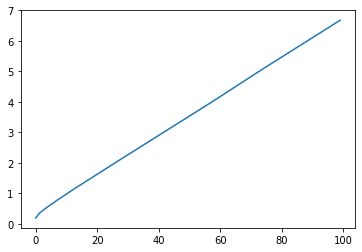

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

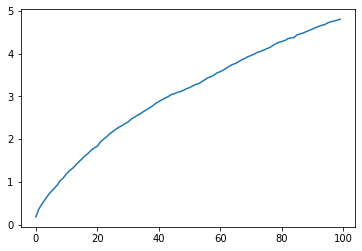

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

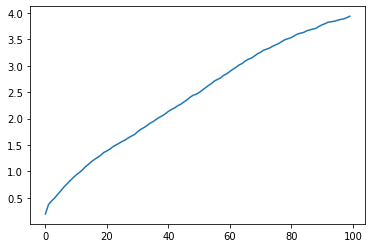

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

In [3]:
cum_sum = np.cumsum(experiment.regrets, axis=1)
mean_regret = np.mean(cum_sum, axis=0)

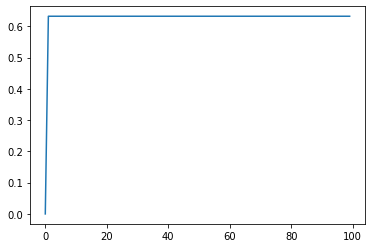

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

In [5]:
experiment.algo.get_config()

0.1


In [4]:
algo = {"Greedy": (Greedy, {})}

experiment = Experiment(algo, "Greedy", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [5]:
experiment.simulate()

100%|██████████| 100/100 [00:03<00:00, 29.34it/s]


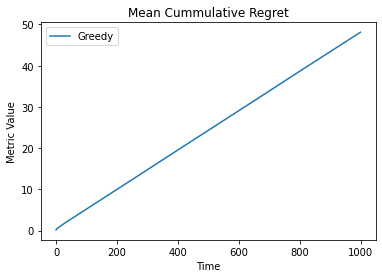

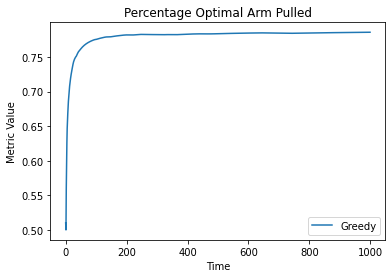

In [6]:
experiment.generate_plots()

In [13]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(0.01)})}

experiment = Experiment(algo, "Greedy", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [14]:
experiment.simulate()

100%|██████████| 100/100 [00:14<00:00,  7.05it/s]


In [15]:
experiment.results["$\epsilon=0.1$-Greedy"]

{'regrets': array([[0.57617419, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.15635551, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.21220431, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.3299584 , 0.        , 0.3299584 , ..., 0.        , 0.        ,
         0.        ],
        [0.10203165, 0.        , 0.10203165, ..., 0.        , 0.        ,
         0.        ],
        [0.83560376, 0.        , 0.83560376, ..., 0.        , 0.83560376,
         0.        ]]),
 'counts': array([[ 46., 954.],
        [ 59., 941.],
        [944.,  56.],
        [944.,  56.],
        [952.,  48.],
        [944.,  56.],
        [949.,  51.],
        [ 65., 935.],
        [963.,  37.],
        [955.,  45.],
        [ 48., 952.],
        [ 77., 923.],
        [947.,  53.],
        [ 58., 942.],
        [944.,  56.],
        [956.,  44.],
        [938.,  62.],
        [ 65.,

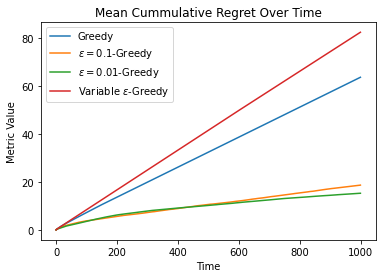

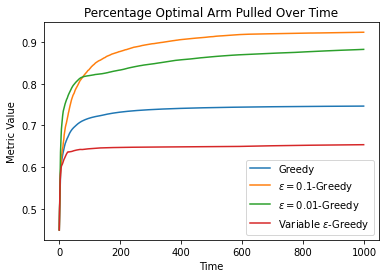

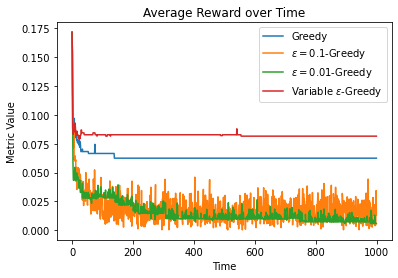

In [7]:
experiment.generate_plots()

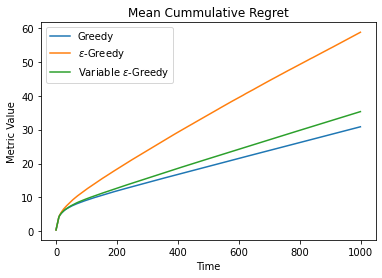

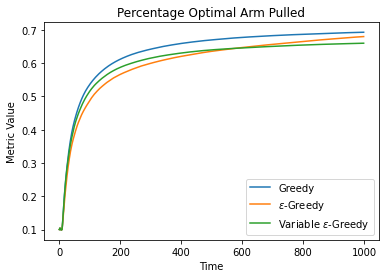

In [7]:
experiment.generate_plots()

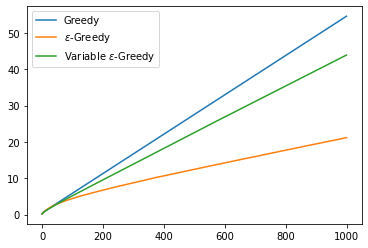

In [7]:
experiment.generate_plots()

In [8]:
MeanCummulativeRegret().__class__.__name__

'MeanCummulativeRegret'

AttributeError: 'Experiment' object has no attribute 'exp_dir'

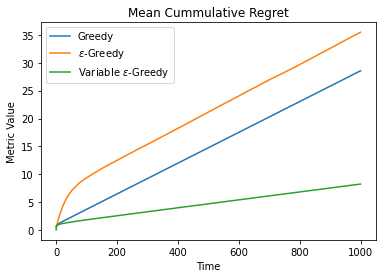

In [4]:
experiment.generate_plots()

AttributeError: 'Experiment' object has no attribute 'exp_dir'

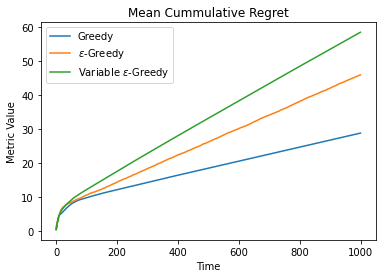

In [5]:
experiment.generate_plots()

In [25]:
algo = {"Softmax with $\tau=0.1$": (SoftmaxPolicy, {"temp": 0.1}),
        "Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
        "Softmax with $\tau=1$": (SoftmaxPolicy, {"temp": 1}),
       "Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(1000)})}

experiment = Experiment(algo, "Softmax Policy", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [26]:
experiment.simulate()

100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


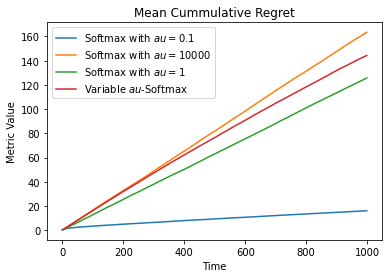

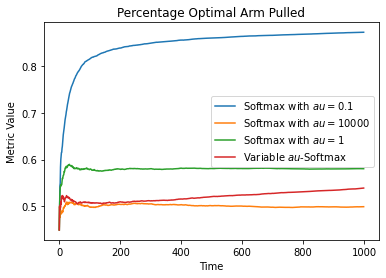

In [27]:
experiment.generate_plots()

$\tau=0.1$

In [9]:
algo = {"UCB with $C=1$": (UCB, {"C": 1}),
#         "UCB with $C=100$": (UCB, {"C": 100}),
       "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(algo, "UCB Policy", num_runs=1000, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [00:54<00:00, 18.31it/s]


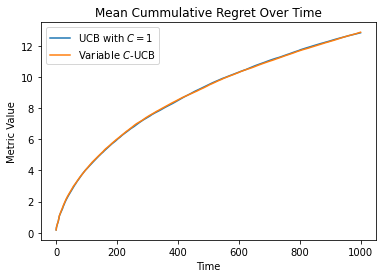

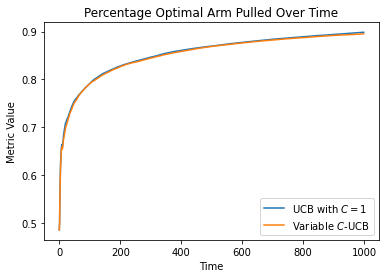

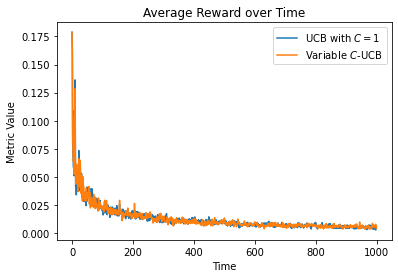

In [11]:
experiment.generate_plots()

In [14]:
algo = {"Thompson Sampling": (ThompsonSampling, {})}

experiment = Experiment(algo, "Thompson Sampling", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [15]:
experiment.simulate()

100%|██████████| 100/100 [00:06<00:00, 15.94it/s]


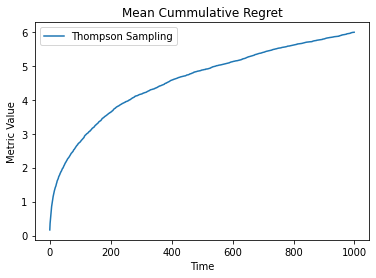

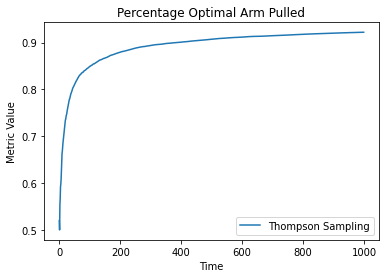

In [16]:
experiment.generate_plots()

In [9]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(algo, "Reinforce", num_runs=1000, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [02:01<00:00,  8.25it/s]


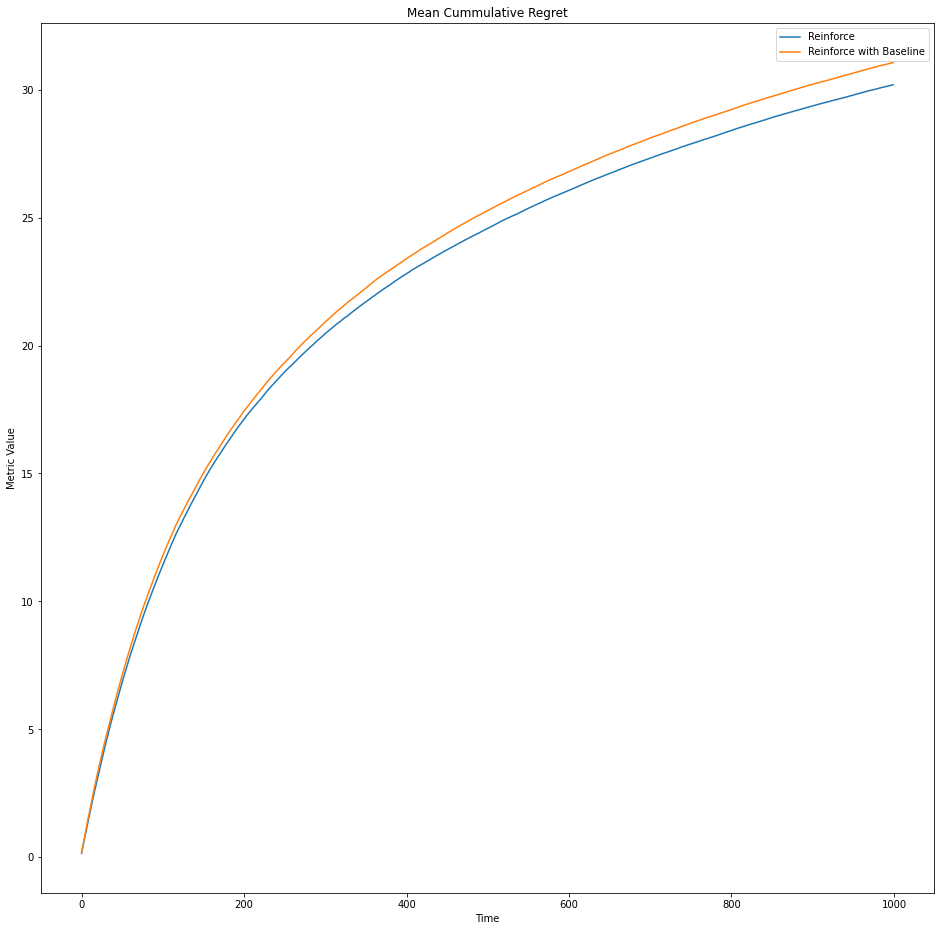

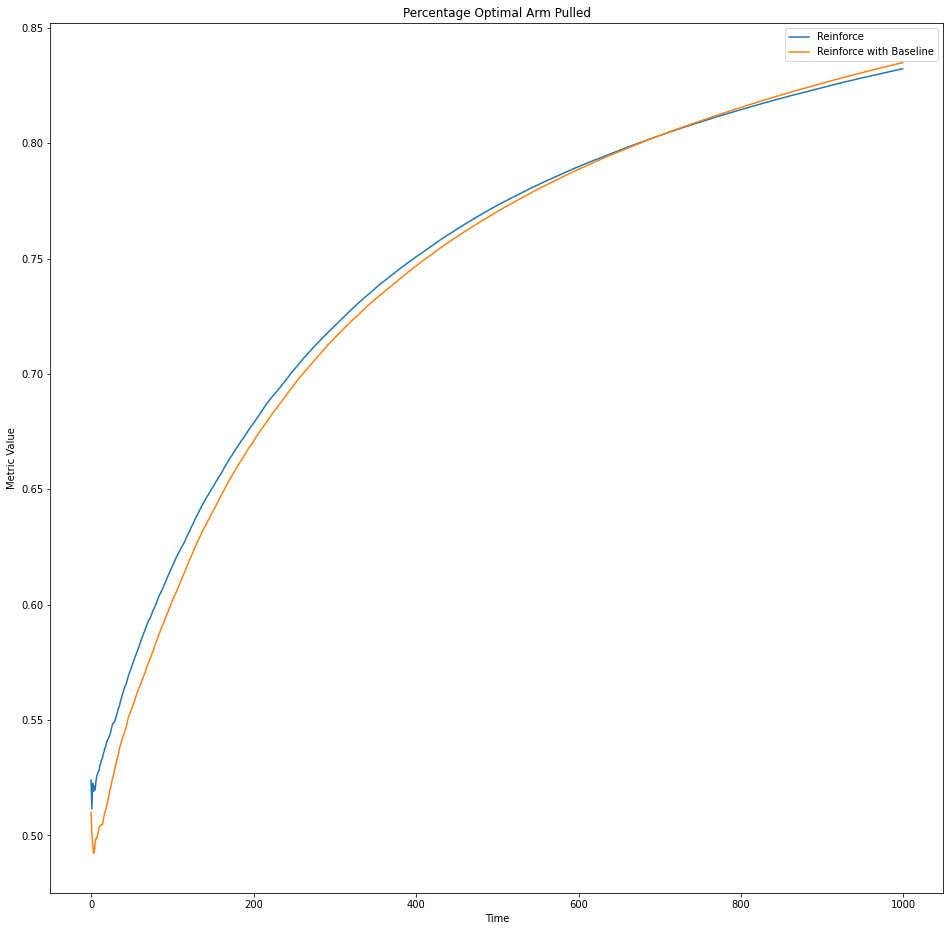

In [11]:
experiment.generate_plots()

In [2]:
p = PercentOptimalArmPull()
arr1 = np.array([[1.2, 0, 0, 1, 0],
                [3, 4, 0, 0, 0.8]])
p(arr1)

array([0.  , 0.25, 0.5 , 0.5 , 0.5 ])